<a href="https://colab.research.google.com/github/spandit98/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Soumyadeep_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#Importing Necessary Libraries and the dataset

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [129]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [130]:

#importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Taking a quick look at the dataset we are provided with.

In [131]:
#load data
netflix_df=pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [132]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [133]:
netflix_df.shape

(7787, 12)

**The dataset has 7787 rows and 12 columns:**

show_id: unique id of each show (not much of a use for us in this notebook)

type: The category of a show, can be either a Movie or a TV Show

title: Name of the show

director: Name of the director(s) of the show

cast: Name of actors and other cast of the show

country: Name of countries the show is available to watch on Netflix

date_added: Date when the show was added on Netflix

release_year: Release year of the show

rating: Show rating on netflix

duration: Time duration of the show

listed_in: Genre of the show

description: Some text describing the show

## Finding out the missing values through a visualisation.

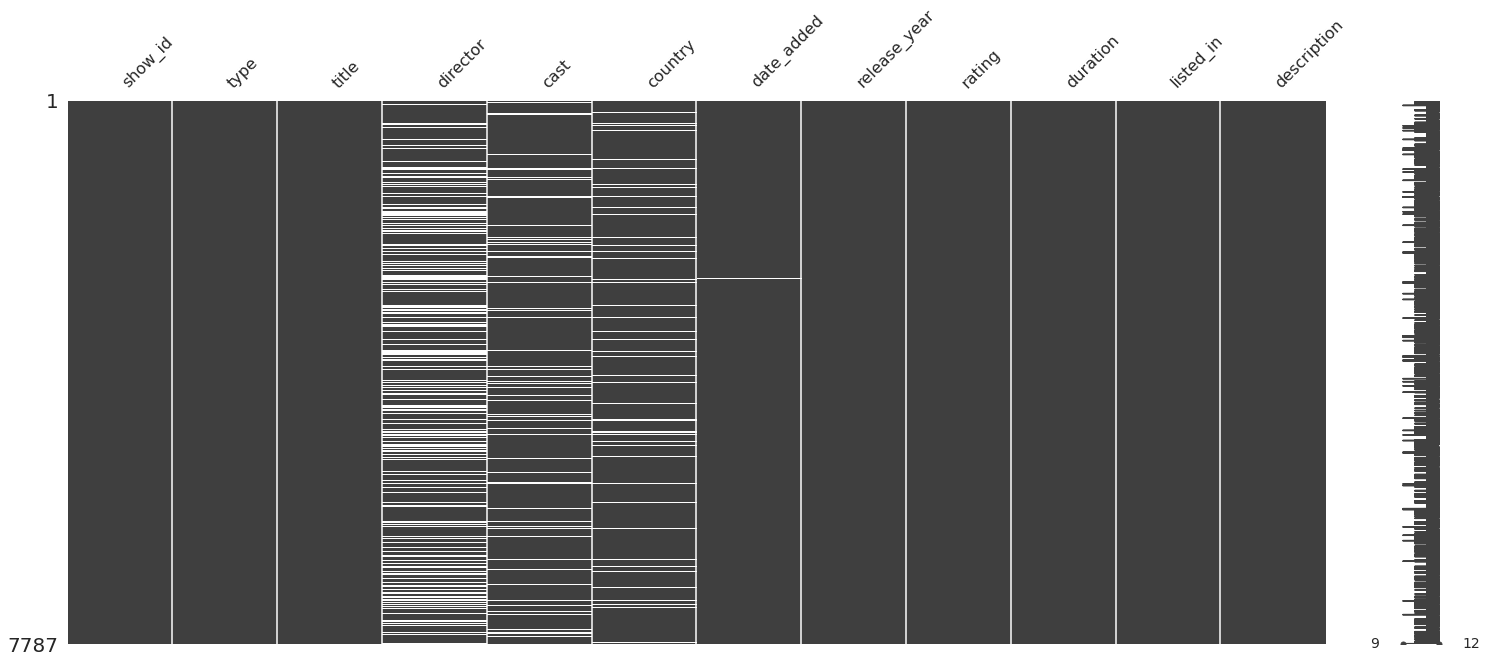

In [134]:
# Visualize missing values as a matrix
msno.matrix(netflix_df)

Using this matrix you can very quickly find the pattern of missingness in the dataset. From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

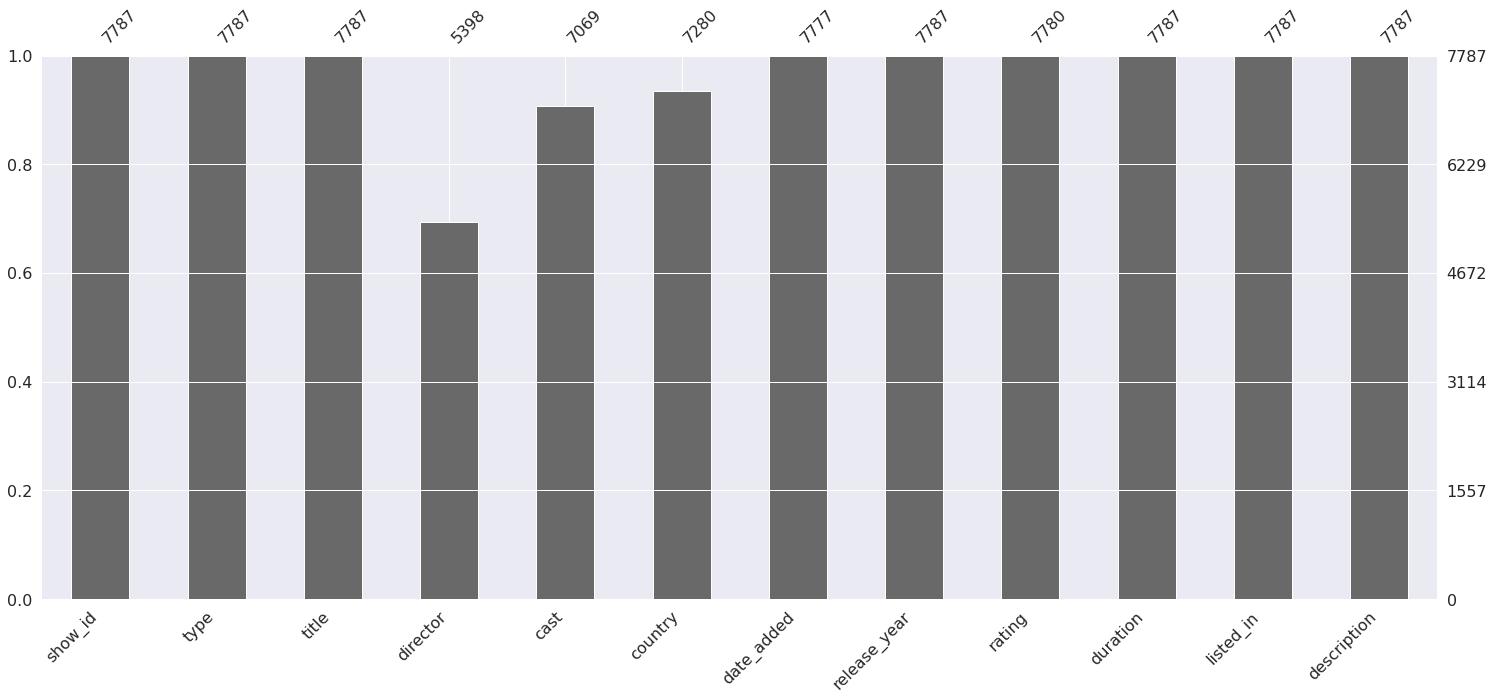

In [135]:
msno.bar(netflix_df);

This bar chart gives you an idea about how many missing values are there in each column. "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

## Data Cleaning
Finding the null values.

In [136]:
#Summing the values to get the null values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**The missing values are in:**

* "*director*": Very less information-not needed for the analysis so I will be dropping this
* "*cast*": there are too many diferent values so I will be dropping this
* "*country*": Important variable hence we need to fix this
* "*date_added*": there are just a few cases, so lets scrap them
* "*rating*": there are just a few cases, so lets scrap them

Let's fix the columns with missing string values.

In [137]:
netflix_df["director"].fillna("Unknown", inplace = True)
netflix_df["cast"].fillna("Unknown", inplace = True)

In [138]:
netflix_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

The values in 'rating' and 'date_added' are very minimal, so we can eliminate them.

In [139]:
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [140]:
netflix_df.dropna(inplace=True)

Let's take a final look at the null values now.

In [141]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Ah! we have overcome imperfection now!

Let's look at the duplicate values now.

In [142]:
duplicates = netflix_df[netflix_df.duplicated()]

In [143]:

netflix_df.duplicated().sum()

0

There is no duplicate value in this dataset.

There are some entries where "country" has multiple values. So let's add a new column with just the first one so we can check witch regions have more productions

In [144]:
# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [145]:
netflix_df.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
principal_country    object
dtype: object

Let's Generate new columns based on variables

In [146]:
#Adding year column from 'date_added'
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[-1])
netflix_df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [147]:
#Adding month column from 'date_added'
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])
netflix_df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [148]:
#Targets based on "rating"
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['age_rating'] = netflix_df['rating'].replace('rating_ages')
netflix_df['age_rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [149]:
# type should be a category
netflix_df['type'] = pd.Categorical(netflix_df['type'])

# age_ratingis another category (4 classes)
netflix_df['age_rating'] = pd.Categorical(netflix_df['age_rating'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])

In [150]:
netflix_df.dtypes

show_id                object
type                 category
title                  object
director               object
cast                   object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
principal_country      object
year_added              int64
month_added            object
age_rating           category
dtype: object

#**EDA and Visualisation**
In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

We will see a few visualisations here and try to analyse the trends of our data.

Now let us monitor the content over the years on monthly basis.

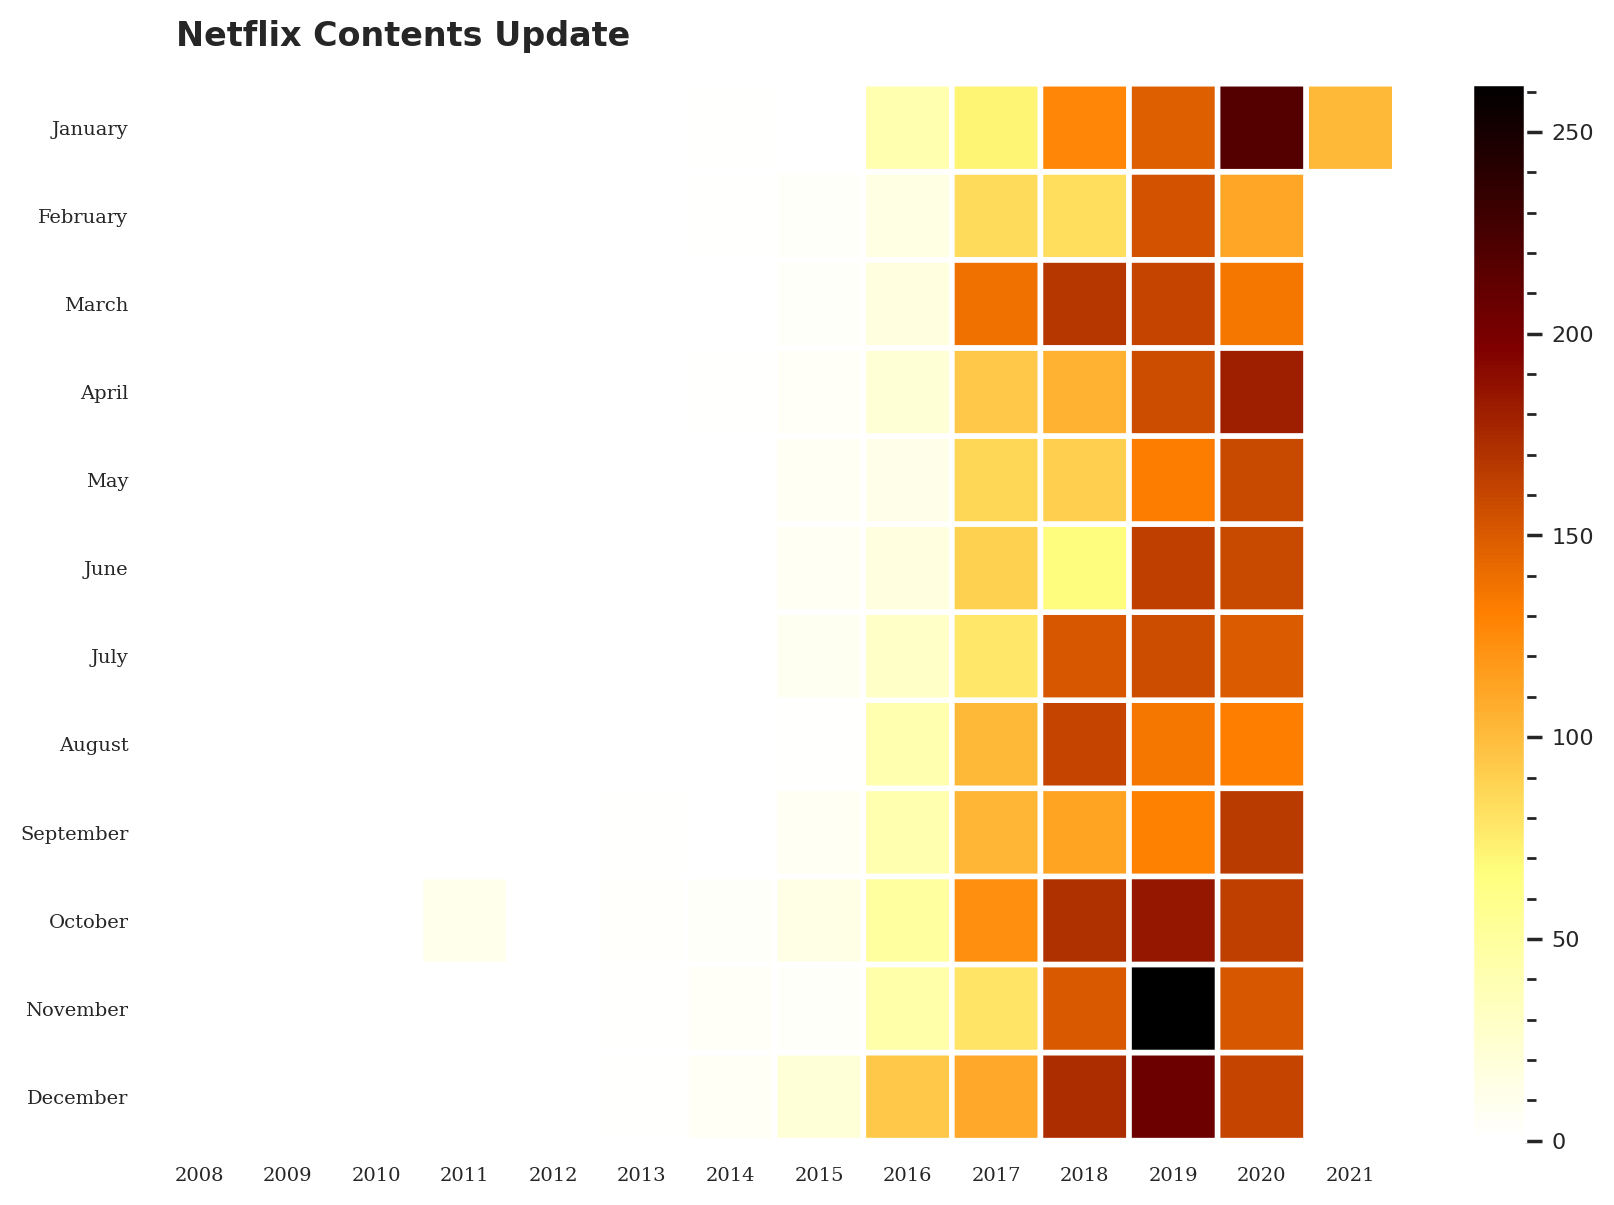

In [151]:
#Monitoring the content over the years on monthly basis with the help of heatmap
netflix_date = netflix_df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

Let's analyse the growth of each type of content compared with each other.

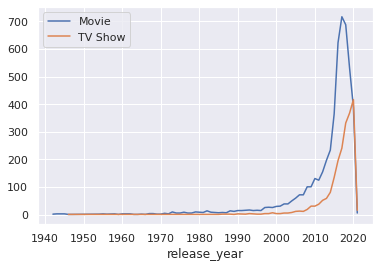

In [152]:
# show growth of type
movie = netflix_df.loc[netflix_df['type'] == 'Movie']
tv = netflix_df.loc[netflix_df['type'] == 'TV Show']
movie.groupby('release_year').show_id.count().plot()
tv.groupby('release_year').show_id.count().plot()
plt.legend(['Movie','TV Show'])

As we can see, that the content has eventually grown from the year 2000 onwards.
And as we had analysed earlier that 2019 was the peak period of the content released, movies are the most released content overtime.

Analysing the movie ratings as per quantity.

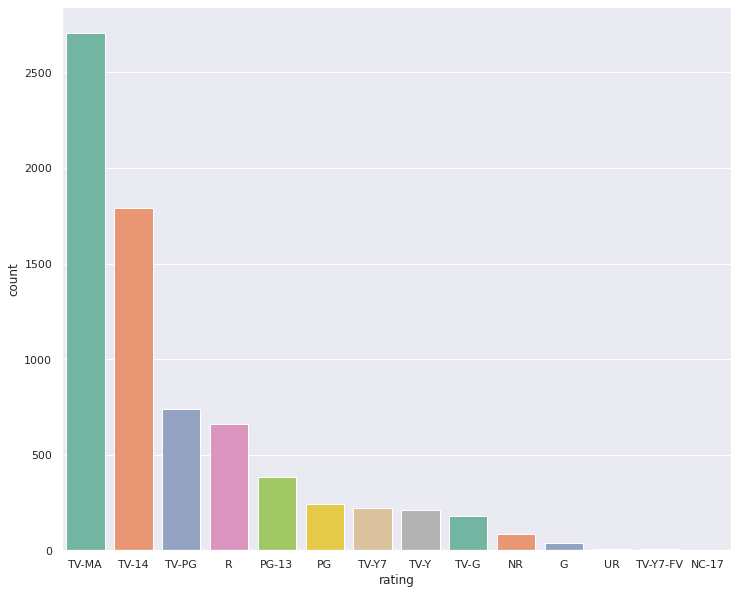

In [153]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2", order=netflix_df['rating'].value_counts().index[0:15])

Seggregating them as per content type and plotting them using a point plot.

In [154]:
#Creating 2 new dataframes for movies and TV shows
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

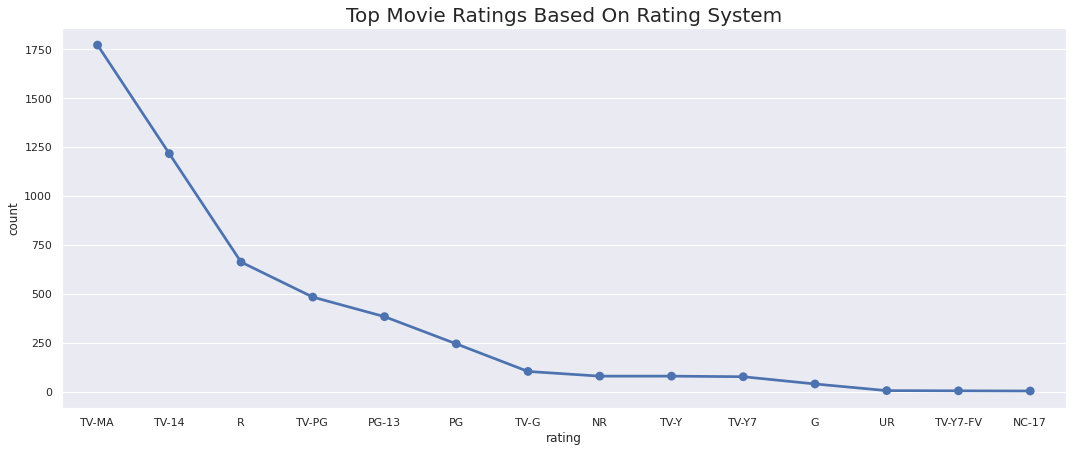

In [155]:
#Plot the ratings on movies
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

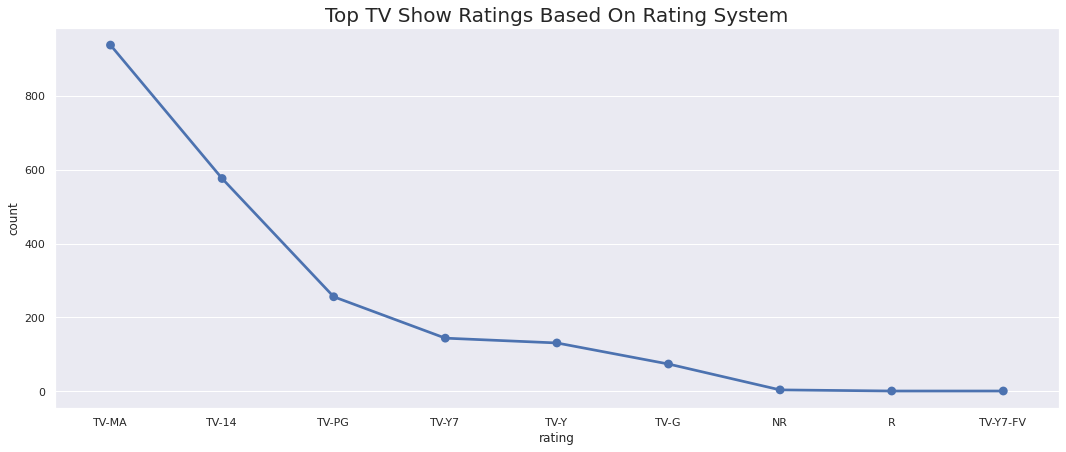

In [156]:
#Plot the ratings on TV Shows
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

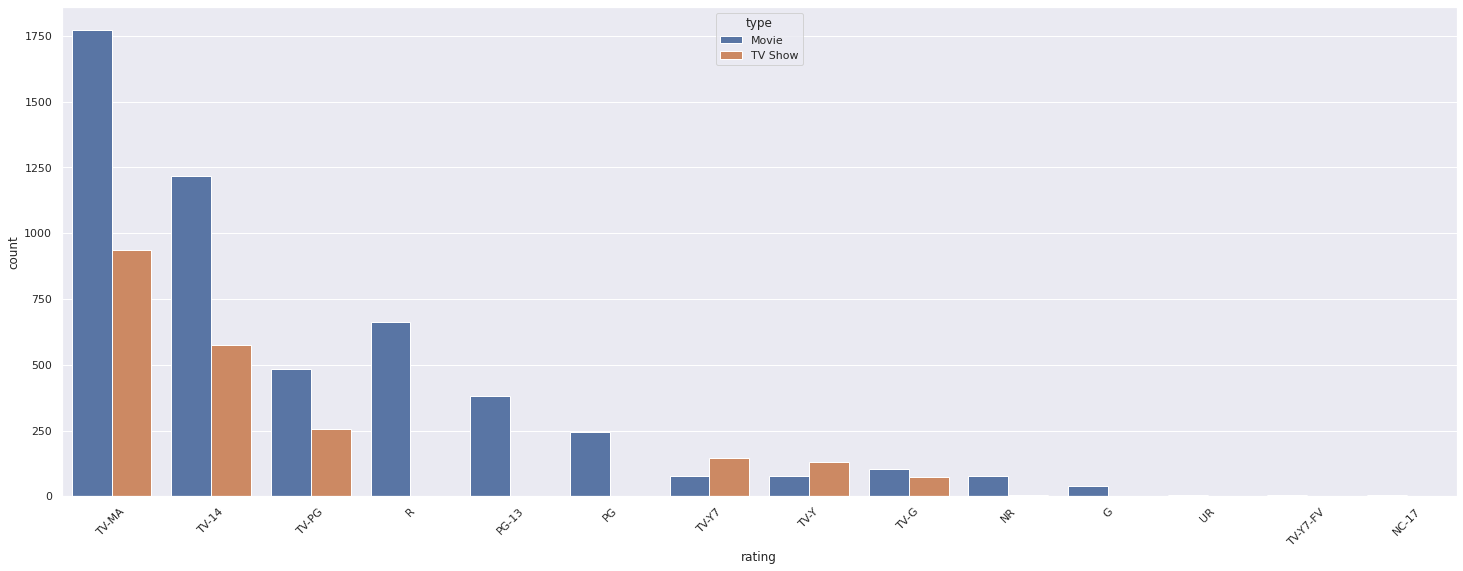

In [157]:
#Plotting the same on a comparison plot
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= netflix_df,hue= "type",order = netflix_df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

**The observations that we had noticed are:** 

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

Looking at the percentage of content released in top 8 nations.

In [158]:
#Listing the top 8 nations
top = netflix_df['country'].value_counts()[0:8]
top.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France'],
      dtype='object')

In [159]:
#Plotting as per their percentage
fig = px.pie(netflix_df,values = top,names = top.index,labels= top.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

The pie chart clearly states that the most number of content is released in the United States followed by India.

In [160]:
#Plotting the same into a funnel
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

Now, let's filter out the same among the type of content.

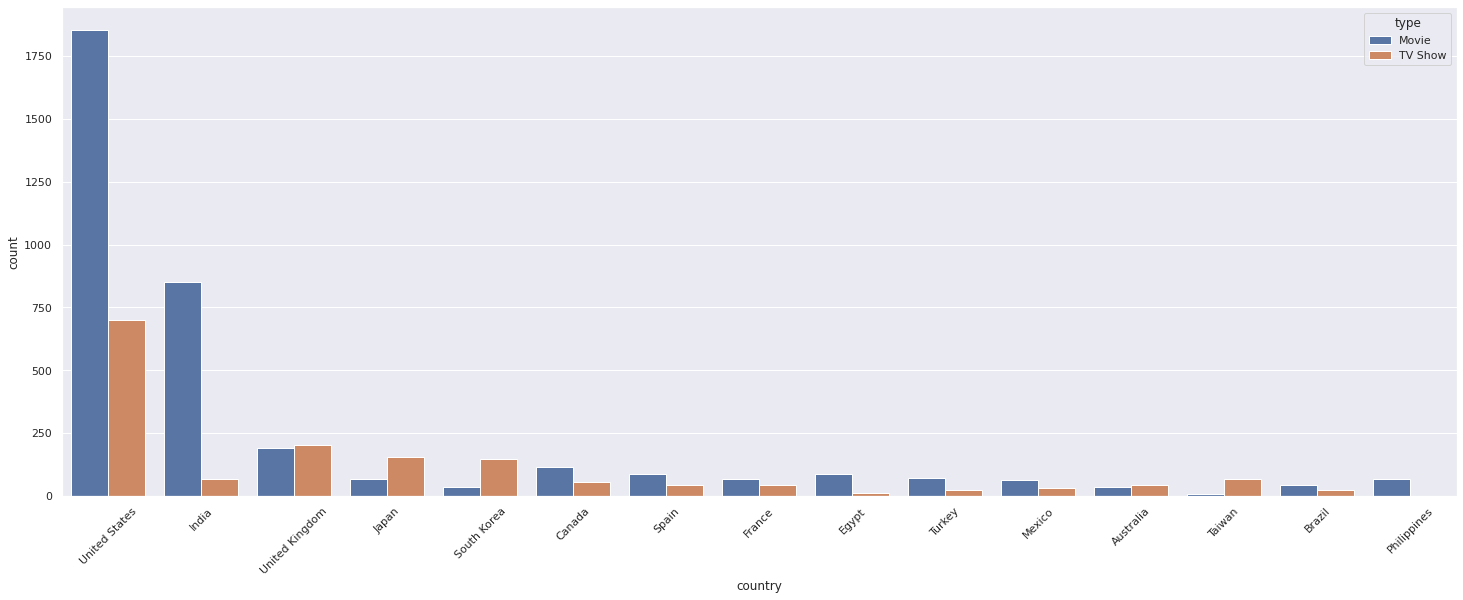

In [161]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= netflix_df,hue= "type",order = netflix_df['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

Movies are the most released type of content on Netflix.

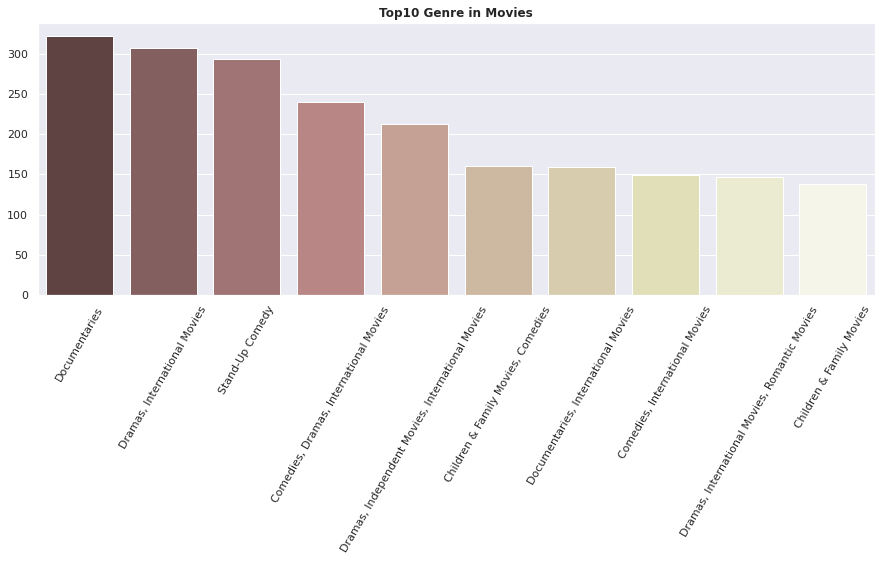

In [162]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

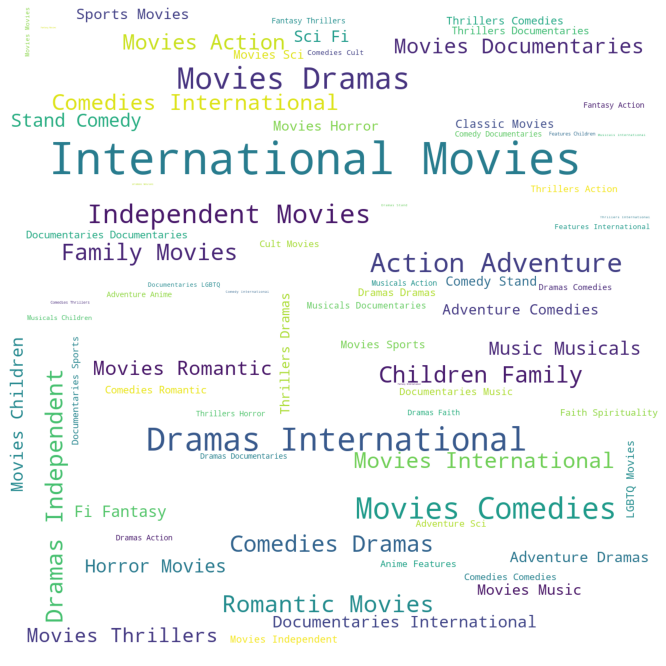

In [163]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

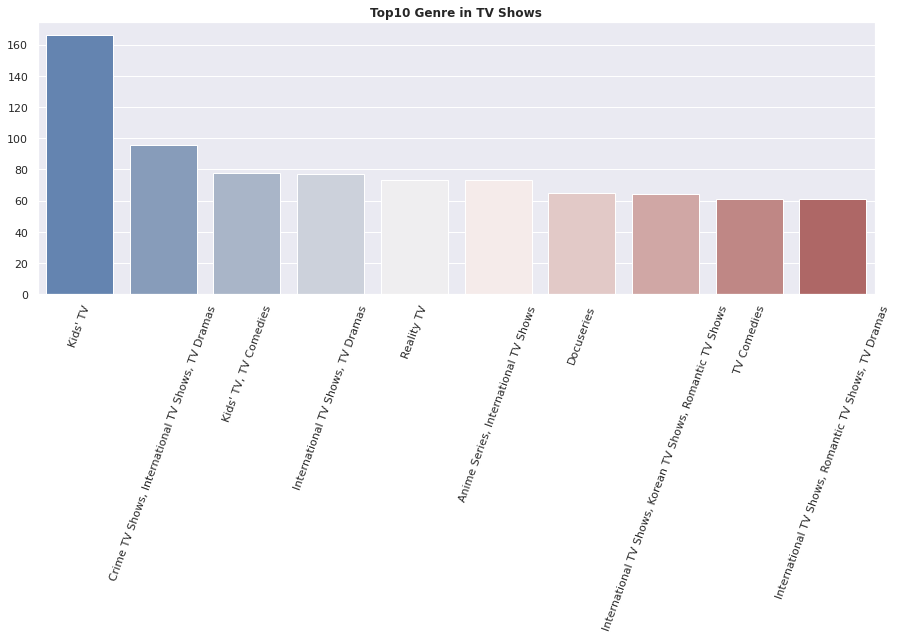

In [164]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

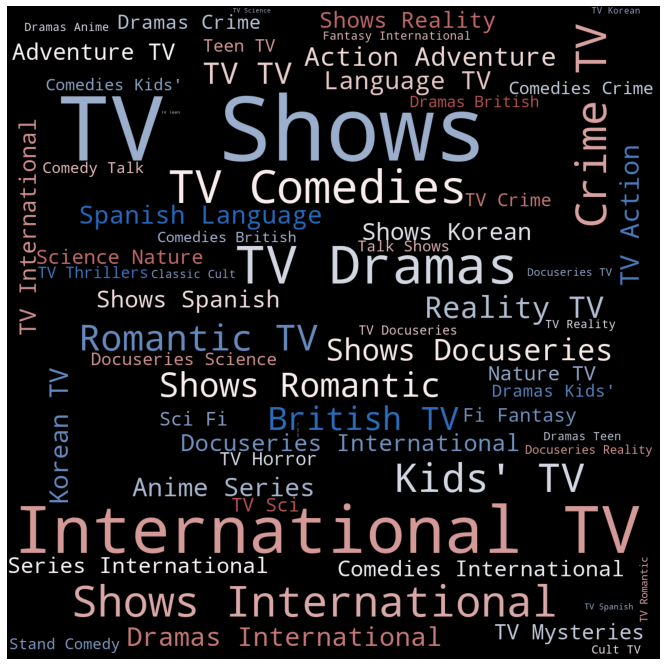

In [165]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [166]:
movies_duration = netflix_df[netflix_df['type'] == 'Movie'].filter(['duration'])
movies_duration['duration'] = movies_duration['duration'].map(lambda x: x.replace(' min', ''))
movies_duration['duration'] = pd.to_numeric(movies_duration['duration'])


fig = px.box(movies_duration, y="duration",)
fig.show()

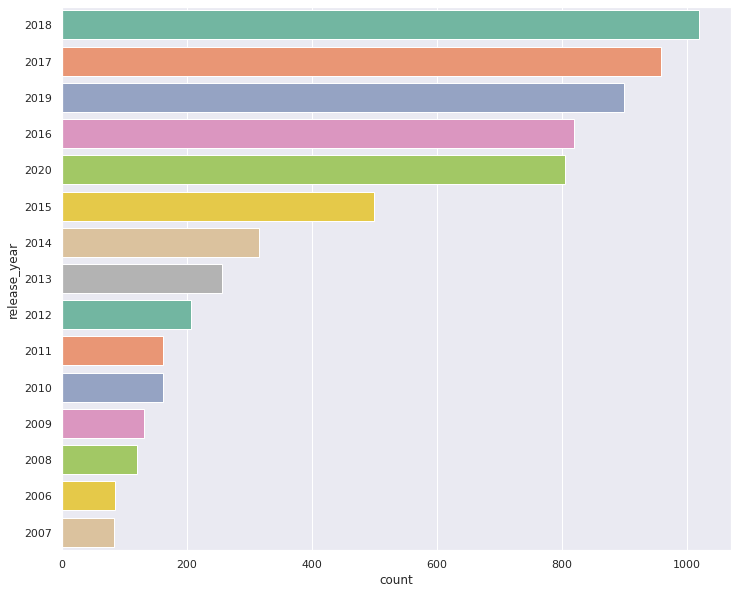

In [167]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_df, palette="Set2", order=netflix_df['release_year'].value_counts().index[0:15])

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
bow_transformer = CountVectorizer(analyzer = 'word').fit(netflix_df['description'])
desc_bow = bow_transformer.transform(netflix_df['description'])
print('Shape of the generated matrix : ',desc_bow.shape)
sparsity = desc_bow.nnz/(desc_bow.shape[0]*desc_bow.shape[1])*100.0
print('Sparsity of the generated matrix',round(sparsity,4))

Shape of the generated matrix :  (7271, 17549)
Sparsity of the generated matrix 0.1228


In [169]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country,year_added,month_added,age_rating
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,NaN


In [170]:
#mapping the multiple value cells into list type
netflix_df['directors'] = netflix_df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['genres'] = netflix_df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['actors'] = netflix_df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['countries'] = netflix_df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
netflix_df['all_features'] = netflix_df['directors'] + netflix_df['genres'] + netflix_df['actors'] + netflix_df['countries']
netflix_df['all_features'] = netflix_df['all_features'].apply(lambda x: " ".join(x))

In [171]:
# Finding TF and IDF metrics
vector = TfidfVectorizer(max_df=1.4, min_df=1,strip_accents = 'ascii', stop_words='english',lowercase=True,use_idf=True,norm=u'l2',smooth_idf=True)
tfidf = vector.fit_transform(netflix_df.all_features)

In [173]:
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country,year_added,month_added,age_rating,directors,genres,actors,countries,all_features,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,NaN,[Unknown],"[International_TV_Shows, TV_Dramas, TV_Sci-Fi_...","[João_Miguel, Bianca_Comparato, Michel_Gomes, ...",[Brazil],Unknown International_TV_Shows TV_Dramas TV_Sc...,391
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,NaN,[Jorge_Michel_Grau],"[Dramas, International_Movies]","[Demián_Bichir, Héctor_Bonilla, Oscar_Serrano,...",[Mexico],Jorge_Michel_Grau Dramas International_Movies ...,112
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,NaN,[Gilbert_Chan],"[Horror_Movies, International_Movies]","[Tedd_Chan, Stella_Chung, Henley_Hii, Lawrence...",[Singapore],Gilbert_Chan Horror_Movies International_Movie...,141
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,NaN,[Shane_Acker],"[Action_&_Adventure, Independent_Movies, Sci-F...","[Elijah_Wood, John_C._Reilly, Jennifer_Connell...",[United_States],Shane_Acker Action_&_Adventure Independent_Mov...,99
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,NaN,[Robert_Luketic],[Dramas],"[Jim_Sturgess, Kevin_Spacey, Kate_Bosworth, Aa...",[United_States],Robert_Luketic Dramas Jim_Sturgess Kevin_Space...,107
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Turkey,2017,July,NaN,[Serdar_Akar],"[International_TV_Shows, TV_Dramas, TV_Mysteries]","[Erdal_Beşikçioğlu, Yasemin_Allen, Melis_Birka...",[Turkey],Serdar_Akar International_TV_Shows TV_Dramas T...,324
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt,2020,June,NaN,[Yasir_Al_Yasiri],"[Horror_Movies, International_Movies]","[Amina_Khalil, Ahmed_Dawood, Tarek_Lotfy, Ahme...",[Egypt],Yasir_Al_Yasiri Horror_Movies International_Mo...,60
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,United States,2019,November,NaN,[Kevin_Reynolds],[Dramas],"[Samuel_L._Jackson, John_Heard, Kelly_Rowan, C...",[United_States],Kevin_Reynolds Dramas Samuel_L._Jackson John_H...,232
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",India,2019,April,NaN,[Shravan_Kumar],"[Horror_Movies, International_Movies]","[Divya_Dutta, Atul_Kulkarni, Mohan_Agashe, Anu...",[India],Shravan_Kumar Horror_Movies International_Movi...,262
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min

In [174]:
from sklearn.metrics import silhouette_score , silhouette_samples 


In [175]:
score = silhouette_score(request_transform, kmeans.labels_, metric='euclidean')

In [176]:
score

0.017877581259236934

In [177]:
samples = silhouette_samples(request_transform, kmeans.labels_, metric='euclidean')

In [178]:
samples

array([ 0.01062634, -0.00502422, -0.00232707, ..., -0.02664539,
        0.04315251, -0.04373395])

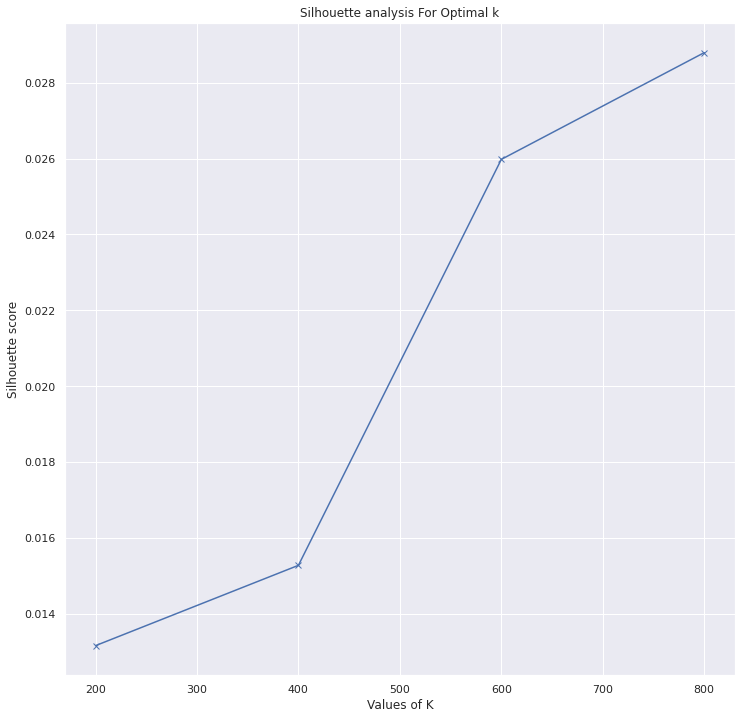

In [180]:
# Silhouette scores for different values of k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters =[200,400,600,800]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 kmeans.fit(tfidf)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(tfidf, cluster_labels))
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [181]:
# Cluster the description data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import linear_kernel
#setting the no. of resulting clusters for kmeans
k = 800
kmeans = KMeans(n_clusters = k, init = 'k-means++')
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()
request_transform = vector.transform(netflix_df['all_features'])
# new column cluster based on the description
netflix_df['cluster'] = kmeans.predict(request_transform) 